In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import igraph

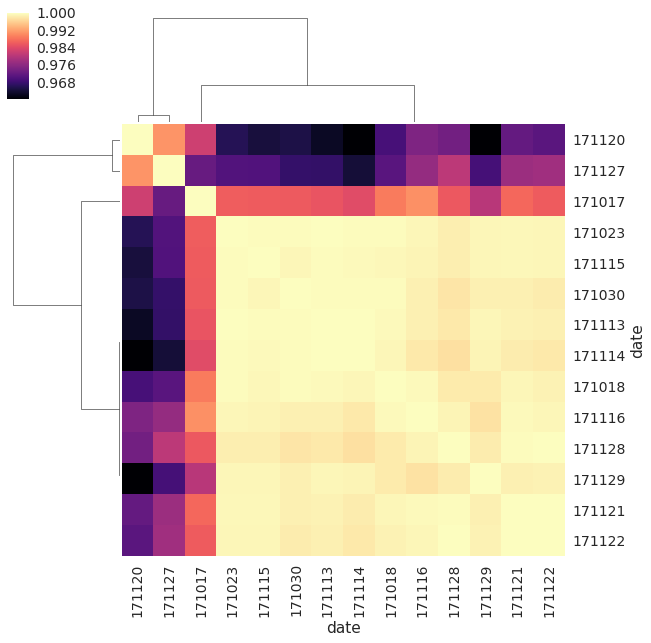

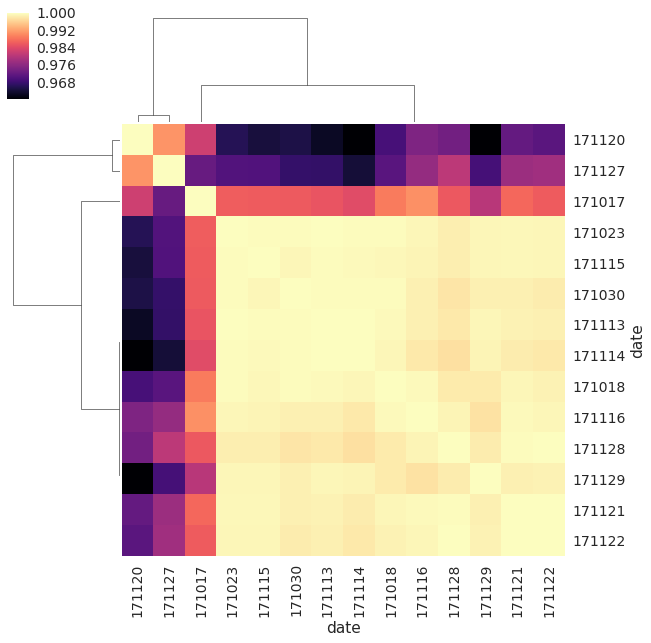

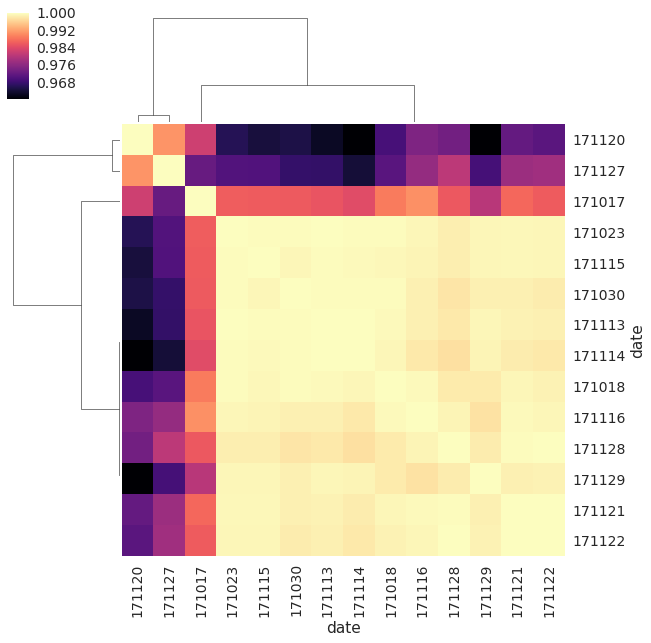

In [4]:


#%% Data input section
raw = pd.read_pickle('time_appended_data.p')
raw.drop('index', axis=1, inplace=True)
# get date and time in the index and drop the name column
data = raw.set_index(['date', 'time'])
data.drop('name', axis=1, inplace=True)

#%% Clustermap

time = 0
# get the first timepoint (later on iterate over time)
cut = data.xs(time, level=1).T

# slice the desired wavelengths
wave_min = 1450
wave_max = 1700
mask = (cut.index.values < wave_max) & (cut.index.values > wave_min)
cut = cut.loc[mask,:]

# drop the first blank run from october because it is useless
#cut.drop('171017', axis=1, inplace=True)

# make correlation between runs
cor = cut.corr()

# make the clustermap
sns.set(font_scale=1.4)

plot = sns.clustermap(cor, figsize=(10,10), 
                      cmap=plt.cm.magma, metric="correlation")
file_name = '../plots/clustermaps/clustermap_t{}_{}_{}.png'\
            .format(time, wave_min, wave_max)
plt.savefig(file_name, dpi=190)
plt.show()

In [8]:
time = 10
# get the first timepoint (later on iterate over time)
cut = data.xs(time, level=1).T

# slice the desired wavelengths
wave_min = 1450
wave_max = 1700
mask = (cut.index.values < wave_max) & (cut.index.values > wave_min)
cut = cut.loc[mask,:]

# drop the first blank run from october because it is useless
#cut.drop('171017', axis=1, inplace=True)

# make correlation between runs
cor = cut.corr()

#%% Create adjacency matrix
adj = cor.copy(deep=True)
mask = adj.values > 0.99
adj.values[mask] = 1
adj.values[~mask] = 0

graph = igraph.Graph.Adjacency(adj.values.tolist()) 
layout = graph.layout_random()
layout = graph.layout_circle()
layout = None
c = cor.index.values.tolist()
layout = graph.layout_fruchterman_reingold()
kwds = {'opacity':0.6, 'vertex_label':c}
plot = igraph.plot(graph, layout=layout, **kwds)
plot.mark_dirty()
plot.show()